In [7]:
import numpy as np

In [10]:
res=np.load('imdb.npz')
#将训练数据和测试数据加载进来

In [16]:
res.files
#看一下有几个属性

['x_test', 'x_train', 'y_train', 'y_test']

In [18]:
x_train=res['x_train']
y_train=res['y_train']
x_test=res['x_test']
y_test=res['y_test']
#将数据分好

In [37]:
len(x_train[1])

433

237.71364


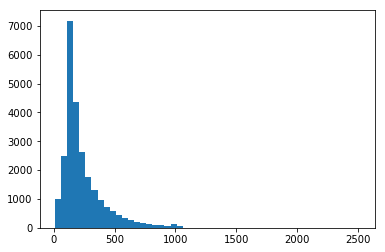

In [26]:
avg_len = list(map(len, x_train))
print(np.mean(avg_len))


import matplotlib.pyplot as plt
plt.hist(avg_len, bins = range(min(avg_len), max(avg_len) + 50, 50))
plt.show()
#做一个统计，看一下一个评论都有几个词，一个评论平均有237个词语

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import keras
import numpy as np



In [40]:
maxword = 400
x_train_pad = sequence.pad_sequences(x_train, maxlen = maxword)
x_test_pad = sequence.pad_sequences(x_test, maxlen = maxword)
vocab_size = np.max([np.max(x_train_pad[i]) for i in range(x_train_pad.shape[0])]) + 1

#由于我们的评论所包含的单词有多有少，所以需要统一一下单词个数，这里确定统一的单词个数为400个，少了补，多了删除。

In [47]:
vocab_size

88585

In [46]:
x_train_pad?

In [38]:
#开始构建我们的深度神经网络
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))#构建第一层，嵌入层，该层的功能像word2vec，对句子进行编码
model.add(Flatten())#添加一个扁平化层，将一个张量变成一个向量

model.add(Dense(2000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
#添加5个全连接层，最后一个是输出层
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#对网络进行编译，确定损失函数（交叉熵损失），优化方法，评判标准
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           5669440   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              51202000  
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total para

In [41]:
model.fit(x_train_pad, y_train, validation_data = (x_test_pad, y_test), epochs = 20, batch_size = 100, verbose = 1)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 582s - loss: 0.4211 - acc: 0.7792 - val_loss: 0.2874 - val_acc: 0.8796
Epoch 2/20
25000/25000 [==============================] - 573s - loss: 0.0726 - acc: 0.9751 - val_loss: 0.4053 - val_acc: 0.8550
Epoch 3/20
25000/25000 [==============================] - 540s - loss: 0.0058 - acc: 0.9977 - val_loss: 0.7739 - val_acc: 0.8490
Epoch 4/20
25000/25000 [==============================] - 545s - loss: 0.0056 - acc: 0.9981 - val_loss: 0.7378 - val_acc: 0.8512
Epoch 5/20
25000/25000 [==============================] - 544s - loss: 0.0052 - acc: 0.9982 - val_loss: 1.0023 - val_acc: 0.8520
Epoch 6/20
25000/25000 [==============================] - 547s - loss: 0.0064 - acc: 0.9981 - val_loss: 0.8512 - val_acc: 0.8350
Epoch 7/20
25000/25000 [==============================] - 529s - loss: 0.0081 - acc: 0.9975 - val_loss: 0.9395 - val_acc: 0.8458
Epoch 8/20
25000/25000 [=======================

NameError: name 'X_test_pad' is not defined

In [42]:
score = model.evaluate(x_test_pad, y_test)

25000/25000 [==============================] - 109s   


In [43]:
score

[1.8414168407848801, 0.83511999999999997]